In [15]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
from TSP_utils import TSP_solver, TSP_plotter, TSP_generator, TSP_loader
import numpy as np
import networkx as nx
import tqdm
import tsplib95
import time
import re
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [6]:
for num in tqdm(range(0,100)):
    pass

100%|██████████| 100/100 [00:00<00:00, 1015569.98it/s]


In [3]:
solver = TSP_solver()
generator = TSP_generator(g_type='tsp_2d', num_min=3, num_max=3)

In [5]:
graph = generator.gen_graph()
graph.nodes

NodeView((0, 1, 2))

In [6]:
result_list = []
for j in tqdm(range(0,100)):
    graph = generator.gen_graph()
    tmp_list = []
    for i in tqdm(range(0,100)):
        
        cur_node_coords = np.array([graph.nodes[k]['coord'] for k in graph.nodes])

        # print(cur_node_coords)
        new_node_coords = np.append(cur_node_coords, np.random.rand(1, 2), axis=0)
        # print(new_node_coords)
        new_edges = [(s[0], t[0], np.linalg.norm(s[1]-t[1])) for s,t in combinations(enumerate(new_node_coords),2)]
        # create new graph
        new_graph = nx.Graph()
        new_graph.add_weighted_edges_from(new_edges)
        feature_dict = {k: {'coord': new_node_coords[k]} for k in new_graph.nodes} 
        nx.set_node_attributes(new_graph, feature_dict)
        graph = new_graph
        # print("Calculating cparam...")
        cparam, time = solver.calc_control_param_from_nx(graph, generated=True, scale=6)
        tmp_list.append(cparam)
        solver.del_tmp_files()
    result_list.append(tmp_list)

02<00:02, 12.81it/s]
100%|██████████| 100/100 [17:30<00:00, 10.51s/it]


0.7760512869297203

In [4]:
import pandas as pd
result_list = np.load('results.npy')
result_col = np.ravel(result_list, order='F')
df_dict = {'num_nodes':[i for i in range(4,104) for _ in range(0,100)], 'result': result_col}
df = pd.DataFrame(df_dict)
df

,num_nodes,result
0,4,0.530100
1,4,0.310611
2,4,1.333484
3,4,1.023660
4,4,0.775570
...,...,...
9995,103,0.775233
9996,103,0.765330
9997,103,0.813146
9998,103,0.815515


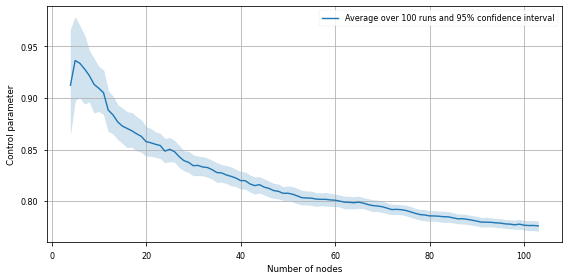

In [10]:
import seaborn as sns
plt.style.use('seaborn-paper')
fig, ax = plt.subplots(1, 1, figsize=(8, 4), sharex=True, sharey=True)
sns.lineplot(data=df, x='num_nodes', y='result', ax=ax, label='Average over 100 runs and 95% confidence interval')
ax.set_ylabel('Control parameter')
ax.set_xlabel('Number of nodes')
ax.grid(True, axis='both')
ax.legend()
plt.tight_layout()
plt.savefig('cparam_vs_num_nodes.jpg', dpi=400)


In [7]:
np.save('results.npy', result_list)

In [8]:
np.round(np.arange(0.7,0.85,0.01),2)

array([0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 ,
       0.81, 0.82, 0.83, 0.84, 0.85, 0.86])

In [9]:
cparam = np.round(np.arange(0.7,0.85,0.01),2)
s2vdqn_results = [1.0553224153911693, np.nan, np.nan, np.nan, np.nan, 1.05178, 1.0558, 1.0538, 1.0546, 1.0554,1.05395, 1.05169, 1.05083, 1.05178, 1.04992, 1.0505]

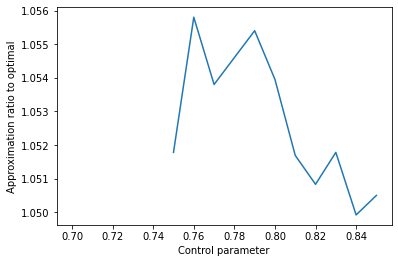

In [11]:
import matplotlib.pyplot as plt
plt.plot(cparam, s2vdqn_results)
plt.ylabel('Approximation ratio to optimal')
plt.xlabel('Control parameter')
plt.savefig('test.jpg', dpi=400)

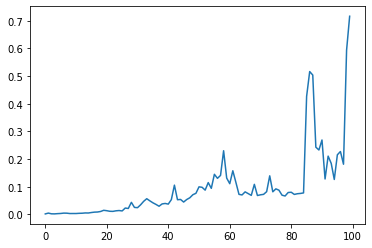

In [37]:
plt.plot([result[1] for result in result_list])

In [17]:
from s2v_utils import *

In [4]:
cparam = 'random'
cparam_list, soltime_list = get_soltime_and_cparam_lists(cparam=cparam)
soltime_list = np.mean(soltime_list, axis=1)

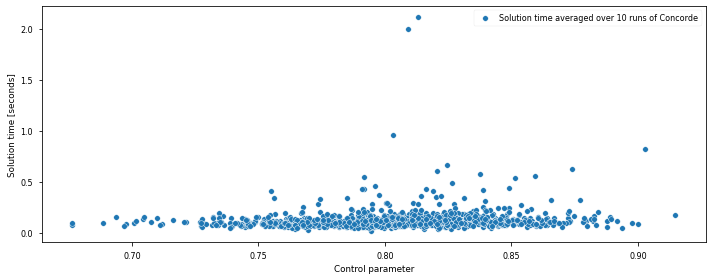

In [6]:
plt.style.use('seaborn-paper')
fig, ax = plt.subplots(1, 1, figsize=(10, 4), sharex=True, sharey=True)
sns.scatterplot(x=cparam_list, y=soltime_list, label='Solution time averaged over 10 runs of Concorde', ax=ax)
# sns.lineplot(x=x, y=y, color='r', label=f'Linear fit for cparam: {cparam}, p-value: {p_value}, r²: {rsquared}, slope: {slope}', ax=ax)
ax.set_ylabel('Solution time [seconds]')
ax.set_xlabel('Control parameter')
ax.legend()
plt.tight_layout()
plt.savefig('scatter_cparam_vs_soltime_{}.jpg'.format(cparam), dpi=400)

In [5]:
cparam='random'
# soltime_dict = get_soltime_from_file(cparam)
soltime_dict = get_soltimes_from_file(cparam=cparam, num_samples=10000, data_root='training_sets')
cparam_dict = get_cparams_from_lengths(cparam=cparam, num_samples=10000, data_root='training_sets')
soltime_list = []
cparam_list = []
for key in soltime_dict:
    soltime_list.append(soltime_dict[key])
    cparam_list.append(cparam_dict[key])
soltime_list = np.mean(soltime_list, axis=1)

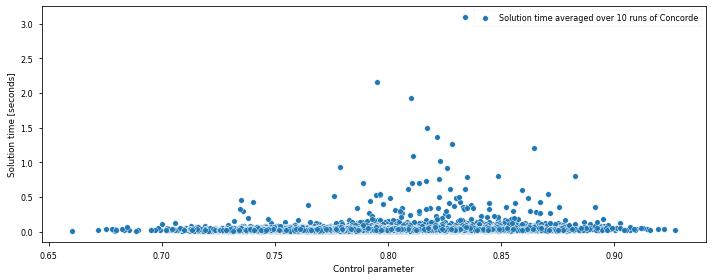

In [6]:
plt.style.use('seaborn-paper')
fig, ax = plt.subplots(1, 1, figsize=(10, 4), sharex=True, sharey=True)
sns.scatterplot(x=cparam_list, y=soltime_list, label='Solution time averaged over 10 runs of Concorde', ax=ax)
# sns.lineplot(x=x, y=y, color='r', label=f'Linear fit for cparam: {cparam}, p-value: {p_value}, r²: {rsquared}, slope: {slope}', ax=ax)
ax.set_ylabel('Solution time [seconds]')
ax.set_xlabel('Control parameter')
ax.legend()
plt.tight_layout()
plt.savefig('scatter_soltime_vs_cparam_{}.jpg'.format(cparam), dpi=400)

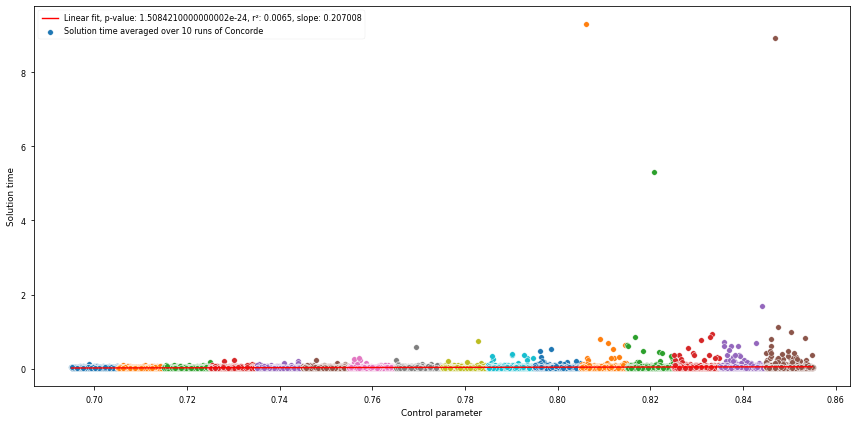

In [19]:
cparams = np.round(np.arange(0.7,0.85,0.01),2)
fig, ax = plt.subplots(1, 1, figsize=(12, 6), sharex=True, sharey=True)
ax.set_ylabel('Solution time')
ax.set_xlabel('Control parameter')
combined_cparam_list, combined_soltime_list = [], []
for k, cparam in enumerate(cparams):
    soltime_list, cparam_list = get_soltime_and_cparam_lists(cparam=cparam)
    soltime_list = np.mean(soltime_list, axis=1)
    sns.scatterplot(x=cparam_list, y=soltime_list, label=k*'_'+'Solution time averaged over 10 runs of Concorde', ax=ax)
    combined_cparam_list.extend(cparam_list)
    combined_soltime_list.extend(soltime_list)
x, y, p_value, rsquared, slope = get_reg_fit_data(combined_cparam_list, combined_soltime_list)
sns.lineplot(x=x, y=y, color='r', label='Linear fit, p-value: {}, r²: {}, slope: {}'.format(p_value, rsquared, slope), ax=ax)
ax.legend(loc='upper left')
plt.tight_layout()
plt.savefig('scatter_soltime_vs_cparams.jpg', dpi=400)